In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Carga del data set
data = pd.read_csv('./master.csv')
# Visualización de los primeros 5 datos, con .tail() se pueden ver los últimos 5 datos
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### Estadisticos

In [3]:
# Estadisticos globales del data frame
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


### Análisis exploratorio

In [4]:
# Valores únicos existentes en la columna age
data['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [5]:
# Forma del data frame, entregara (Número de filas, Número de columnas)
data.shape

(27820, 12)

In [6]:
# Cuenta de aparición de los paises en el data frame

# Se agrupan los datos por la columna country
# Se toma la columna year para tener una de referencia (Podría haber sido cualquier otra)
# Se saca la cuenta de los datos con .count()
# Se ordenan los datos de manera descendente con .sort_values(ascending=False)
data.groupby(['country'])['year'].count().sort_values(ascending=False)

country
Mauritius                 382
Iceland                   382
Austria                   382
Netherlands               382
Mexico                    372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Macau                      12
Dominica                   12
Mongolia                   10
Name: year, Length: 101, dtype: int64

### Número de suicidios promedio de cada país por cada año

In [7]:
# Deshabilitamos la cantidad de filas y columnas máximas que permite por defecto pandas
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Creamos una tabla de pivotaje para ver los suicidios promedio  a lo largo de los años por cada pais
# Con margins=True indicamos que sume los valores por filas y por columnas, Dando el total de muertes por año y por pais
# Finalmente con fillna(0) indicamos que llene con 0 los espacios en donde no existan datos
data.pivot_table('suicides_no', index='country', columns='year', aggfunc='mean', margins=True).fillna(0)

year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Albania,0.000000,0.000000,6.083333,5.250000,5.666667,0.000000,0.000000,3.916667,6.083333,4.166667,7.333333,7.416667,14.166667,12.833333,11.583333,4.500000,9.916667,11.083333,10.333333,12.166667,0.000000,0.000000,10.333333,13.333333,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,7.462121
Antigua and Barbuda,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.000000,0.083333,0.166667,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.00000,0.033951
Argentina,165.666667,190.333333,190.500000,196.166667,187.250000,178.333333,162.583333,182.000000,185.833333,186.750000,183.666667,185.750000,182.000000,195.583333,201.916667,231.166667,261.000000,263.500000,274.083333,260.083333,254.833333,259.000000,245.500000,254.916667,240.333333,245.250000,242.666667,270.666667,248.916667,269.250000,256.083333,0.00000,221.018817
Armenia,0.000000,0.000000,0.000000,0.000000,0.000000,7.750000,6.666667,6.916667,8.833333,9.333333,10.833333,7.250000,6.416667,5.500000,5.583333,5.083333,5.000000,6.166667,4.916667,0.000000,0.000000,6.500000,5.916667,5.250000,4.416667,6.083333,5.583333,6.583333,5.583333,4.833333,6.166667,6.70000,6.392617
Aruba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.750000,0.833333,0.333333,0.750000,0.166667,0.666667,0.833333,0.750000,0.666667,0.333333,0.333333,0.583333,0.750000,0.000000,0.000000,0.000000,0.000000,0.00000,0.601190
Australia,155.083333,170.333333,180.333333,181.000000,172.166667,183.500000,190.666667,187.583333,169.833333,190.250000,180.833333,202.166667,220.500000,219.333333,207.333333,199.250000,204.833333,193.250000,179.666667,176.166667,0.000000,176.416667,185.750000,195.083333,194.750000,201.666667,199.333333,215.000000,217.333333,240.916667,252.250000,0.00000,194.752778
Austria,174.250000,178.250000,172.416667,154.250000,158.166667,152.083333,147.416667,146.583333,142.000000,148.000000,149.000000,148.250000,132.666667,129.916667,129.583333,132.333333,124.083333,129.416667,121.333333,118.500000,116.583333,108.083333,107.083333,105.583333,106.500000,105.333333,107.333333,106.333333,107.583333,109.500000,104.250000,120.10000,131.081152
Azerbaijan,0.000000,0.000000,0.000000,0.000000,0.000000,9.500000,11.166667,12.000000,9.916667,3.916667,4.083333,5.750000,8.916667,4.666667,4.500000,5.166667,26.416667,7.666667,10.750000,9.000000,0.000000,0.000000,4.583333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,8.625000
Bahamas,0.083333,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.583333,0.250000,0.166667,0.250000,0.166667,0.250000,0.500000,0.916667,0.083333,0.250000,0.083333,0.166667,0.333333,0.166667,0.416667,0.333333,0.500000,0.833333,0.333333,0.416667,0.416667,0.000000,0.000000,0.00000,0.336957


In [8]:
# Volvemos a los valores originales
pd.options.display.max_rows = 60
pd.options.display.max_columns = 20

### Cantidad de registros por sexo y por rango etario

In [9]:
# Vemos cuantos datos hay por sexo
data['sex'].value_counts()

female    13910
male      13910
Name: sex, dtype: int64

In [10]:
# Vemos cuantos datos hay por cada rango etario
data['age'].value_counts()

25-34 years    4642
15-24 years    4642
55-74 years    4642
75+ years      4642
35-54 years    4642
5-14 years     4610
Name: age, dtype: int64

In [11]:
# Vemos los primeros 2 registros
data.head(2)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent


In [12]:
# Verificamos que valores existen en la columnas 'HDI for year'
data['HDI for year'].unique()

array([  nan, 0.619, 0.656, 0.695, 0.722, 0.781, 0.783, 0.694, 0.705,
       0.731, 0.762, 0.775, 0.811, 0.818, 0.831, 0.833, 0.836, 0.632,
       0.605, 0.648, 0.721, 0.723, 0.728, 0.733, 0.865, 0.882, 0.898,
       0.927, 0.93 , 0.932, 0.933, 0.935, 0.764, 0.794, 0.815, 0.853,
       0.879, 0.881, 0.884, 0.885, 0.609, 0.64 , 0.778, 0.78 , 0.774,
       0.786, 0.727, 0.816, 0.819, 0.817, 0.821, 0.824, 0.7  , 0.716,
       0.753, 0.765, 0.793, 0.785, 0.683, 0.796, 0.798, 0.806, 0.851,
       0.874, 0.866, 0.883, 0.886, 0.889, 0.888, 0.89 , 0.644, 0.664,
       0.701, 0.71 , 0.711, 0.715, 0.724, 0.576, 0.608, 0.702, 0.737,
       0.742, 0.746, 0.752, 0.755, 0.686, 0.696, 0.713, 0.749, 0.773,
       0.779, 0.782, 0.827, 0.849, 0.861, 0.867, 0.892, 0.903, 0.909,
       0.91 , 0.912, 0.654, 0.699, 0.788, 0.814, 0.83 , 0.832, 0.573,
       0.596, 0.629, 0.679, 0.706, 0.718, 0.72 , 0.623, 0.652, 0.682,
       0.704, 0.75 , 0.756, 0.761, 0.766, 0.807, 0.653, 0.685, 0.73 ,
       0.776, 0.772,

### Países del estudio

In [13]:
# Verificamos los paises que estan en el estudio
data['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

### Generaciones que aparecen en el estudio

In [14]:
# Verificamos que generaciones aparecen en el estudio
data['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

### Muertes anuales en chile

In [15]:
# Vemos la cantidad de muertes en chile por cada año
data[data['country'] == 'Chile'][['year', 'country']].groupby('year').count()

,country
year,
1985,12
1986,12
1987,12
1988,12
1989,12
1990,12
1991,12
1992,12
1993,12


In [16]:
pd.options.display.max_rows

60

### Promedio de muertes anuales por pais

In [17]:
pd.options.display.max_rows = None
# De data se obtienen las columnas 'country' y 'suicides_no'
# Estos datos se agrupan por pais
# Se obtiene el promedio de suicidios por cada pais
# Finalmente se ordenan de manera descendente según el número promedio de suicidios
data[['country', 'suicides_no']].groupby('country').mean().sort_values(by='suicides_no', ascending=False)

,suicides_no
country,
Russian Federation,3733.771605
United States,2779.604839
Japan,2169.091398
Ukraine,952.232143
Germany,933.532051
France,914.241667
Republic of Korea,703.575269
Brazil,609.174731
Poland,482.979167


In [18]:
pd.options.display.max_rows = 60

### Cantidad de registros por cada generación

In [19]:
# Se obtiene la cantidad de personas de cada generación
data['generation'].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

### Diagrama de las muertes anuales

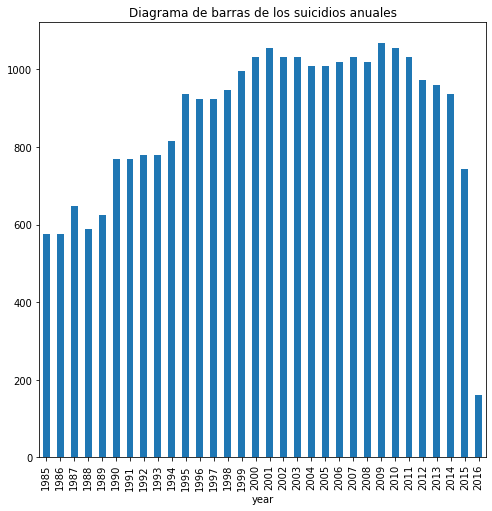

In [20]:
# Se crea un 'figure' y se indica que tendra un ancho de 8 y un alto de 8
plt.figure(1, figsize=(8,8))
# Se obtiene la cuenta de los datos agrupados por año y se grafican
data.groupby(['year']).count()['country'].plot(kind='bar')
# Agregamos un título al gráfico
plt.title('Diagrama de barras de los suicidios anuales')
plt.show()

### Suicidios totales por pais en comparación al primedio de muertes

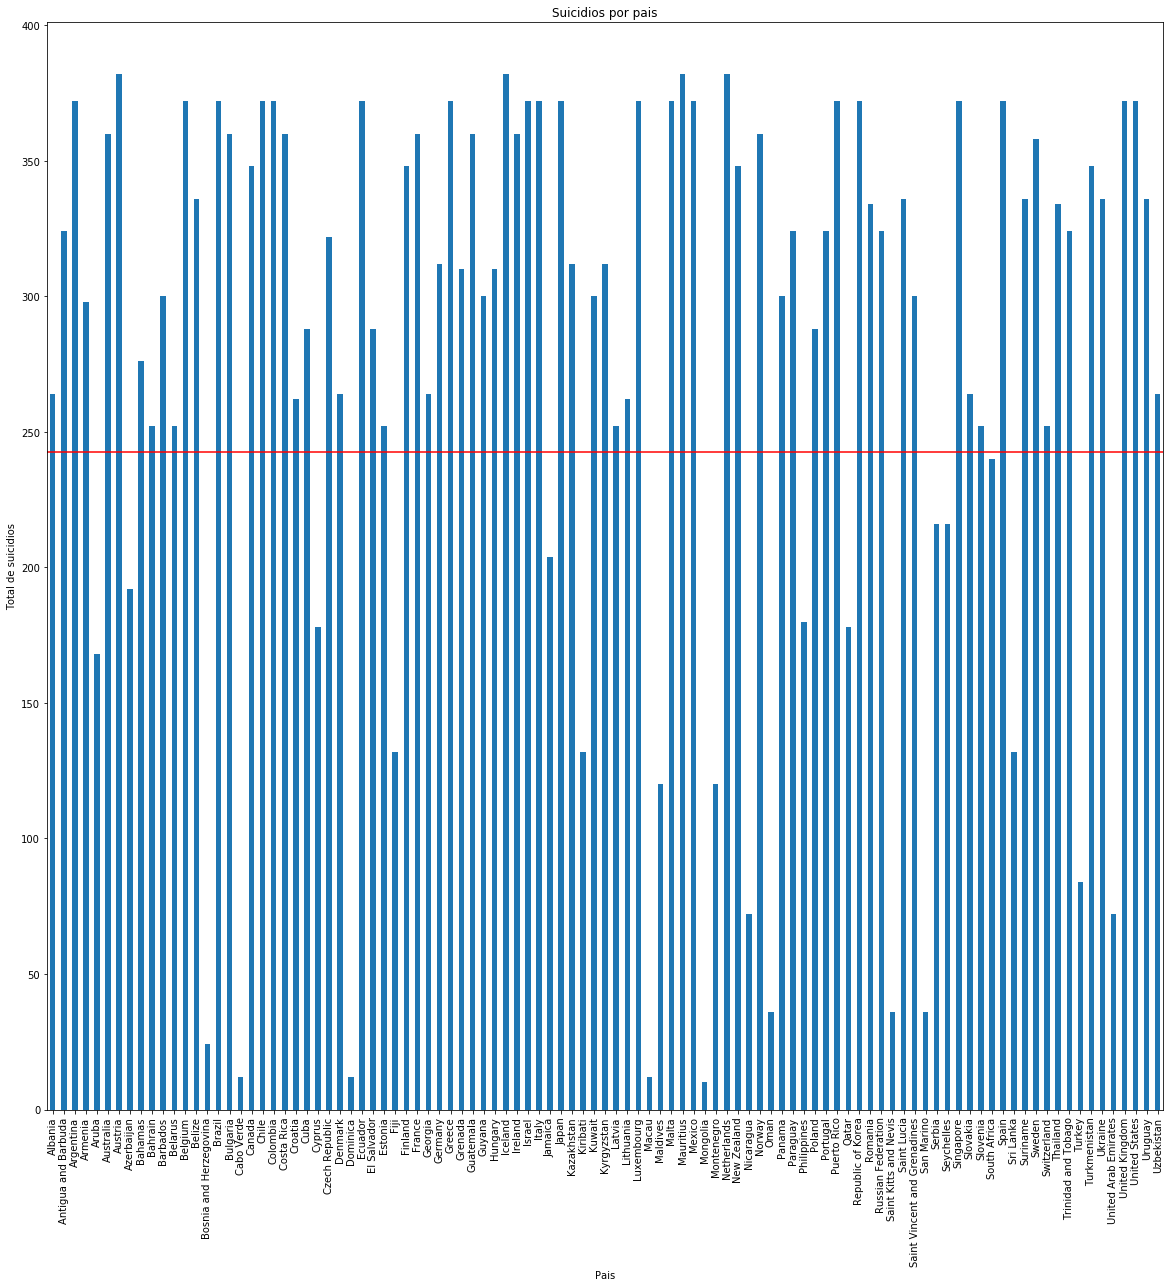

In [21]:
plt.figure(1, figsize=(20, 20))
# Gráficamos los las muertes agrupadas por país
data.groupby(['country'])['year'].count().plot(kind='bar')
# Se configura el título del gráfico
plt.title('Suicidios por pais')
# Se configura la etiqueta del eje x
plt.xlabel('Pais')
# Se configura l etiquets del eje y
plt.ylabel('Total de suicidios')
# Se crea una línea recta que indica el promedio de muertes
plt.hlines(data['suicides_no'].sum() / data.shape[0], -5, 2020, color='red')
plt.show()

### Creamos decadas y agrupamos la cantidad de suicidios por decadas

In [22]:
# Creamos una columna que indicara la decada a la que pertence el suicidio
data['decade'] = (data['year'] // 10) * 10
# Convertimos a string y concatenamos un 's'
data['decade'] = data['decade'].astype(str) + 's'
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,decade
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,1980s
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,1980s
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,1980s
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,1980s
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,1980s


In [23]:
# Verificamos la cantidad de muertes por decada
data.groupby('decade').count()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
decade,,,,,,,,,,,,
1980s,3012,3012,3012,3012,3012,3012,3012,3012,444,3012,3012,3012
1990s,8640,8640,8640,8640,8640,8640,8640,8640,1356,8640,8640,8640
2000s,10308,10308,10308,10308,10308,10308,10308,10308,1824,10308,10308,10308
2010s,5860,5860,5860,5860,5860,5860,5860,5860,4740,5860,5860,5860


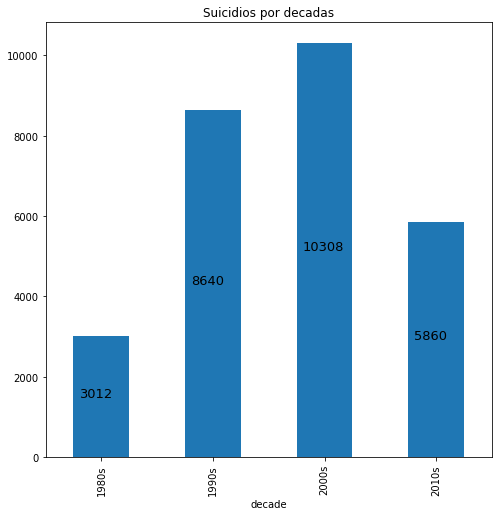

In [24]:
plt.figure(figsize=(8, 8))
# Agrupamos la data por decadas
# Obtenemos su cuenta
# Creamos un gráfico de tipo barra
data.groupby('decade')['decade'].count().plot(kind='bar')
plt.title('Suicidios por decadas')

# Iteramos la cantidad de décadas que existan
for i in range(len(data['decade'].unique().tolist())):
    # Obtenemos el valor de Y, el que será la cantidad de datos que tiene el intervalo
    y = data.groupby('decade').count()['country'].iloc[i]
    # Agregamos como texto la cantidad de datos del intervalo
    # en las coordenadas x=posición del gráfico - 0.2, y=La cantidad de datos en la decada / 2
    plt.text(i-0.2, y//2, y, color='black', fontsize=13)

plt.show()

#### Algunas conlcusiones

* bosnia, cabo verde, republica dominicana, macau y mongolia son los paises con menor tasa de suicidios
* islandia, austria, mauritius y netherlands son los paises con mayor tasa de suicidio
* En el mundo hay un promedio de 243 muertes anuales aproximadamente
* Al parecer los suicidios han ido disminuyendo en la última década a nivel mundial
* La generación z (Aquellos nacidos después de 1995) al parecer tienen menos suicidios
* Al ver Chile, este aparenta tener una tasa de suicidio que sigue una distribución uniforme
* Rusia, estados unidos y japón son los paises con mayor tasa de suicidios promedio, superando a los demas paises en mas de 1.000 suicidios anuales
* La decada del 2000 ha sido la que mas suicidios ha presentado según el estudio, por ocntraparte, la de 1980 es la que menos suicidios presento